In [5]:
!pip install -q pandas scikit-learn matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


col_names = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv(url, header=None, names=col_names)
print("Shape:", df.shape)
df.head()

Shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:

df = df.drop(columns=['id'])


df['diagnosis'] = df['diagnosis'].map({'M': 'high', 'B': 'low'})


np.random.seed(42)
benign_idx = df[df['diagnosis'] == 'low'].index
medium_idx = np.random.choice(benign_idx, size=len(benign_idx)//2, replace=False)
df.loc[medium_idx, 'diagnosis'] = 'medium'

print(df['diagnosis'].value_counts())

diagnosis
high      212
low       179
medium    178
Name: count, dtype: int64


In [9]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"Train: {X_train.shape[0]} samples | Test: {X_test.shape[0]} samples")

Train: 455 samples | Test: 114 samples


In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [11]:
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy : {acc:.4f}")
print(f"F1-score (macro) : {f1:.4f}\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.6140
F1-score (macro) : 0.5913

              precision    recall  f1-score   support

        high       0.97      0.93      0.95        42
         low       0.44      0.58      0.50        36
      medium       0.38      0.28      0.32        36

    accuracy                           0.61       114
   macro avg       0.60      0.60      0.59       114
weighted avg       0.62      0.61      0.61       114



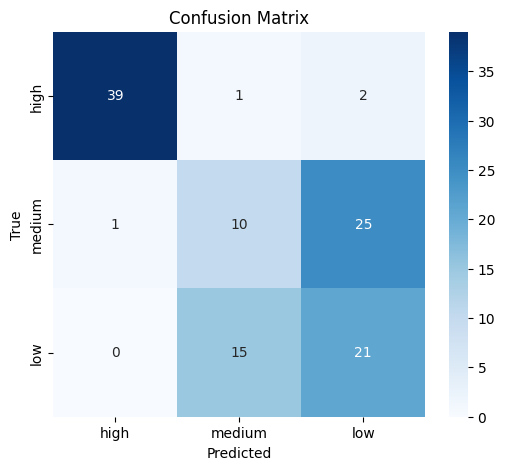

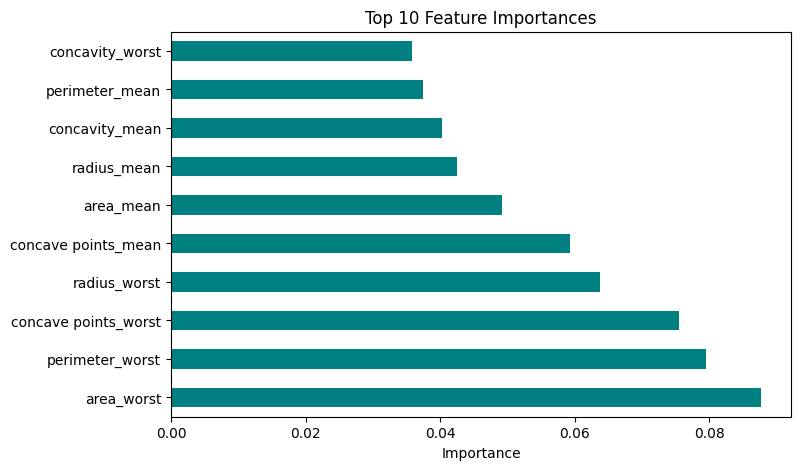

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['high','medium','low'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['high','medium','low'],
            yticklabels=['high','medium','low'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# Top-10 feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.nlargest(10)
plt.figure(figsize=(8,5))
top10.plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.show()